# Data Munging


In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
raw_file_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_file_path, 'train.csv')
test_file_path = os.path.join(raw_file_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [4]:
test_df['Survived'] = -999 #Adding Survived column as it is missing in test dataframe

In [23]:
df = pd.concat((train_df, test_df), axis=0)
# Axis = 0 means the dataframes will be stacked, Axis = 1 is side wise/ adjacent
# Use reset_index to continue using PassengerId as index

In [6]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Fixing the Embarked Column

In [ ]:
# Get the rows having Null Values for a particular column
df[df.Embarked.isnull()]

In [12]:
# How many different values are there 
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
# Since both the passengers survived, we want to check which embarked has highest survival rate
pd.crosstab(df[df.Survived != -999].Embarked, df[df.Survived != -999].Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [22]:
# Option 1
# Impute the missing value with 'S' 
#df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# or use the fillna function by: If inplace = true than the same data frame will be updated here 'df' if false, 
# than it will return a new data frame with the filled values
#df.Embarked.fillna('S', inplace = True)

In [21]:
# Validate giving index + 1 as iloc exclues the from - to range passed
#df.iloc[[61, 829],:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,S,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,S,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [25]:
# Option 2: Explore the fare of each class from each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [26]:
# The fare 76 for embarked C is more close to 80,So replace the missing values with 'C'
df.Embarked.fillna('C', inplace = True)

In [27]:
df.iloc[[61, 829],:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,C,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,C,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [28]:
# Check Null values if any:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Fixing the Fare Column

In [32]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [35]:
df[(df.Embarked == 'S') & (df.Pclass == 3)]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.00,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
3,26.00,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
5,35.00,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
8,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
11,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,3,female,1,1,PP 9549
13,20.00,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,3,male,0,0,A/5. 2151
14,39.00,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,3,male,1,0,347082
15,14.00,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,3,female,0,0,350406


In [37]:
median_fare = df[(df.Embarked == 'S') & (df.Pclass == 3)].Fare.median()

In [38]:
df.Fare.fillna(median_fare, inplace = True)

In [39]:
df.iloc[1043,:]

Age                       60.5
Cabin                      NaN
Embarked                     S
Fare                      8.05
Name        Storey, Mr. Thomas
Parch                        0
Pclass                       3
Sex                       male
SibSp                        0
Survived                  -999
Ticket                    3701
Name: 1044, dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Fixing Age  

In [42]:
# Setting the max rows to display
pd.options.display.max_rows = 15

In [43]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-999,364498


### Option 1: Replace with Mean Age

In [45]:
%matplotlib inline

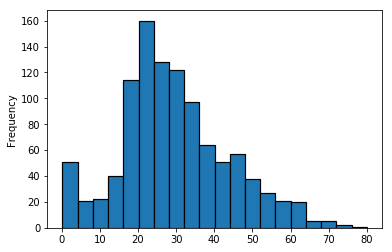

In [49]:
df.Age.plot(kind = 'hist', bins =20,edgecolor='black', linewidth=1.2);

In [52]:
df.Age.mean()

29.881137667304014

In [53]:
# Replace with mean values
# df.Age.fillna(df.Age.mean(), inplace = True)

### Option 2: Replace with median age of gender

In [54]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

/home/ketan/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


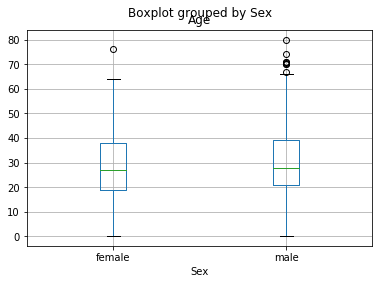

In [56]:
df[df.Age.notnull()].boxplot('Age','Sex');

In [57]:
# Gender distributution is even so its not a good option to replace by gender
# replace; age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace = True)
# The transform function will return the pandas Series of same length with the Age value as the median age
# of the result of group by, here Sex, So all the ages will be replaced by the median ages


In [58]:
df.groupby('Sex').Age.transform('median')
# d

PassengerId
1       28.0
2       27.0
3       27.0
4       27.0
5       28.0
6       28.0
7       28.0
        ... 
1303    27.0
1304    27.0
1305    28.0
1306    27.0
1307    28.0
1308    28.0
1309    28.0
Name: Age, Length: 1309, dtype: float64

### Option 3: Replace with Median Age of Pclass 

/home/ketan/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


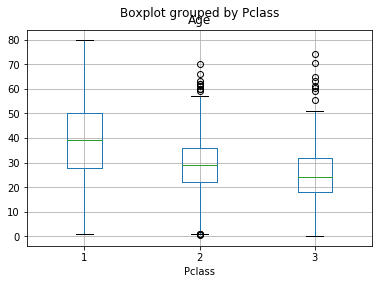

In [61]:
df[df.Age.notnull()].boxplot('Age', 'Pclass');

In [62]:
# replace;
# age_pclass_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(age_pclass_median, inplace = True)
# The transform function will return the pandas Series of same length with the Age value as the median age
# of the result of group by, here pclass, So all the ages will be replaced by the median ages


### Option 4: Replace with median age of Title 

In [63]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [68]:
# Function to extract the title of the name
# patter => <Familyname><comma><title><firstname>
def getTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [69]:
# Use map function to apply the function on each value of the column
df.Name.map(lambda x: getTitle(x))
# Also df.Name.map(getTitle) will work

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [71]:
# To get the unique titles
df.Name.map(lambda x: getTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [74]:
def getTitleFromName(name):
    titleGroup = {
        'mr': 'Mr',
        'mrs' : 'Mrs', 
        'miss': 'Miss', 
        'master': 'Master', 
        'don': 'Sir', 
        'rev': 'Sir', 
        'dr': 'Officer', 
        'mme': 'Mrs' ,
        'ms': 'Mrs',
        'major': 'Officer',  
        'lady': 'Lady', 
        'sir': 'Sir', 
        'mlle': 'Mrs', 
        'col': 'Officer',  
        'capt': 'Officer',  
        'the countess': 'Lady',
        'jonkheer': 'Sir', 
        'dona': 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return titleGroup[title]

In [75]:
# Create title feature
df['Title'] = df.Name.map(getTitleFromName)

In [76]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,Mr
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,female,1,-999,19928,Mrs


/home/ketan/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


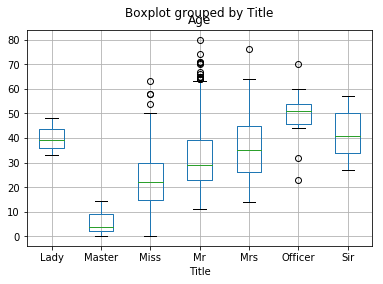

In [77]:
# Box Plot of age with Title
df[df.Age.notnull()].boxplot('Age', 'Title');

In [84]:
# replace missing values 
# as per above observations, categorically we can find a better way to group the data and getting the median age
# Title can be considered as good candidate to replace the missing values
median_age_by_title = df.groupby('Title').Age.transform('median')

In [80]:
df.Age.fillna(median_age_by_title, inplace = True)

In [86]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


#  Working with Outliers


## Age


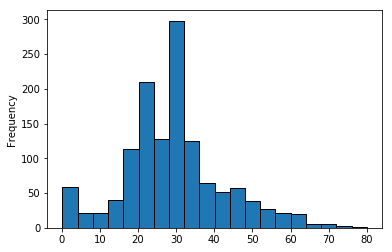

In [88]:
# Create histogram to understand distribution
df.Age.plot(kind = 'hist', bins = 20, edgecolor = 'black');

In [89]:
df[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-999,19877,Mrs


## Fare 


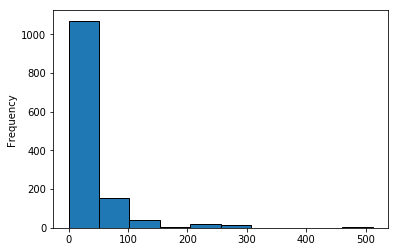

In [91]:
df.Fare.plot(kind = 'hist', edgecolor = 'black');

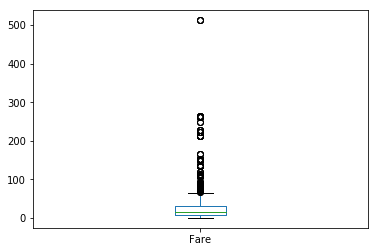

In [95]:
df.Fare.plot(kind = 'box');
# Outlier here , the fare significantly higher than normal fare

In [96]:
# Getting the Outliers
df[df.Fare > 300]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-999,PC 17755,Mrs


In [97]:
# Transforming data to remove skewness, Adding 1 to accomodate 0 Fare as log(0) is not defined
LogFare = np.log(df.Fare + 1.0) 

In [98]:
LogFare

PassengerId
1       2.110213
2       4.280593
3       2.188856
4       3.990834
5       2.202765
6       2.246893
7       3.967694
          ...   
1303    4.510860
1304    2.171907
1305    2.202765
1306    4.699571
1307    2.110213
1308    2.202765
1309    3.150952
Name: Fare, Length: 1309, dtype: float64

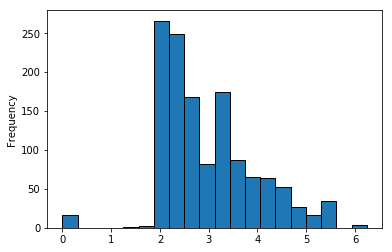

In [99]:
LogFare.plot(kind = 'hist',bins = 20,edgecolor = 'black');

In [100]:
# Binning 
# In cut, qcut performs quantile based binning, 4 is the number of bins
# Splitting the Fare in 4 bins where each bin is having equal number of values
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [102]:
# Specify the name of each bin,Converts the numerical features to categorical features.
# This approach is called as discretization
pd.qcut(df.Fare, 4, labels = ['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
          ...    
1303    very_high
1304     very_low
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

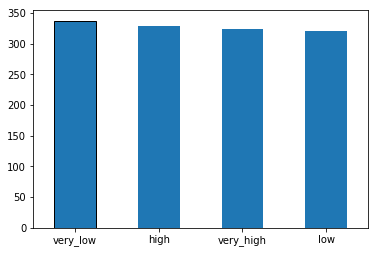

In [109]:
# Step 1 => discretization
# Step 2 => Get Value Counts by category
# Step 3 => Plot the categories
pd.qcut(df.Fare, 4, labels = ['very_low','low','high','very_high']).value_counts().plot(kind = 'bar', rot = 0,edgecolor = "black");

In [111]:
# Create Fare Bin Feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels = ['very_low','low','high','very_high'])

## Feature Engineering 
